In [ ]:
pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%pip install install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!python -m pip show scikit-learn

Name: scikit-learn
Version: 1.0.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: /usr/local/lib/python3.7/dist-packages
Requires: threadpoolctl, joblib, scipy, numpy
Required-by: yellowbrick, sklearn-pandas, qudida, mlxtend, lightgbm, librosa, imbalanced-learn, fastai


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.datasets import load_diabetes
load_diabetes_data=load_diabetes()

In [ ]:
load_diabetes_data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [ ]:
volunteer = pd.read_csv('/content/drive/MyDrive/CSE422LabProject/diabetes.csv')
volunteer.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
volunteer.shape

(768, 9)

In [ ]:
volunteer.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
volunteer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
volunteer.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
volunteer.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [ ]:
volunteer.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
volunteer.duplicated().sum()

0

In [ ]:
print(load_diabetes_data["feature_names"])

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [ ]:
print(load_diabetes_data["target"])

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.
  72. 

In [ ]:
diabetes_volunteer= pd.DataFrame(data=load_diabetes_data["data"], columns=load_diabetes_data["feature_names"])
print("The DataFrame has {} samples and {} features".format(diabetes_volunteer.shape[0], diabetes_volunteer.shape[1]))
print("\n")
diabetes_volunteer.head()

The DataFrame has 442 samples and 10 features




,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd4016ae450>,
      dtype=object)

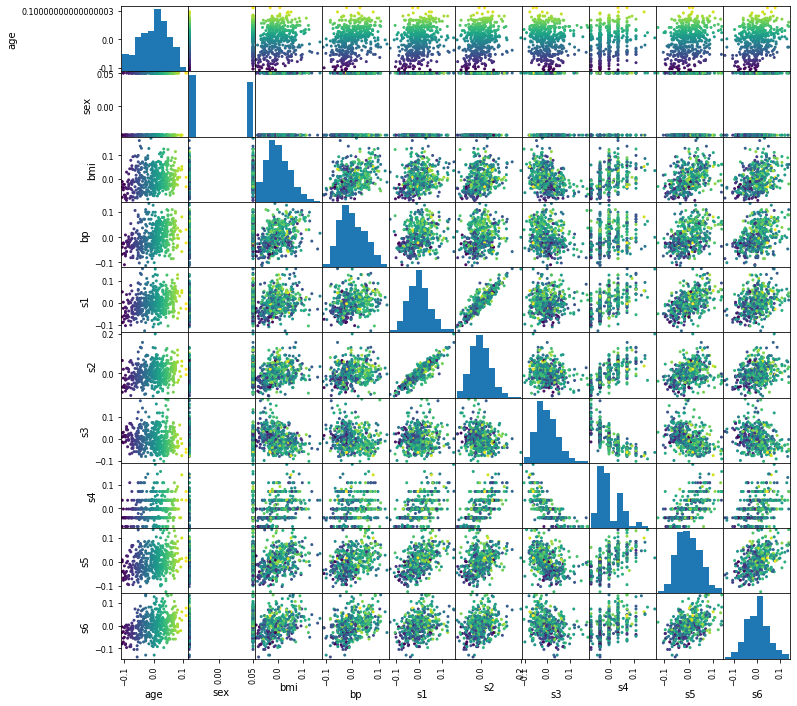

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(diabetes_volunteer[['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']], c=diabetes_volunteer["age"] , figsize=(12,12), alpha=1)

In [ ]:
# X label data
X = diabetes_volunteer.drop("age", axis=1)
y= diabetes_volunteer["age"]


In [ ]:
#Lets split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.33, random_state=43,)


In [ ]:
print("Training set: X->{} , y->{} \n Testing set: X->{} , y->{}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

Training set: X->(296, 9) , y->(296,) 
 Testing set: X->(146, 9) , y->(146,)


In [ ]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [ ]:
regr.score(X_test, y_test)

0.15941407380080153

In [ ]:
print("The Training accuracy of the model is {:.2f}".format(regr.score(X_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(regr.score(X_test, y_test)))

The Training accuracy of the model is 0.17
The Testing accuracy of the model is 0.16


In [ ]:
predictions = regr.predict(X_test)
print(predictions)

[-1.20927931e-02 -4.30951822e-04  2.73155176e-02  3.44752731e-02
  2.14861876e-02 -2.28553319e-02  7.06494524e-03  3.10675225e-03
  2.94699430e-03  1.00298788e-02 -6.01948077e-03  2.59809366e-02
  7.73646745e-04  1.38526769e-02 -1.61700711e-02  2.22980776e-02
  1.92473076e-02  6.40623383e-03  2.74153637e-02  9.61428767e-03
  3.87055549e-02 -1.66758333e-02  2.35558505e-02  1.61196591e-02
  4.58301054e-03 -1.05551167e-02  3.65007953e-02 -2.37942968e-02
 -7.46428868e-03  2.20953739e-02  2.57711435e-02 -1.15717355e-02
  9.65023889e-03 -1.01560713e-02 -1.21225221e-02  9.72955993e-03
 -4.44992661e-03 -3.89694866e-02 -7.86054664e-03 -1.68709353e-03
 -2.19977975e-03 -9.21762554e-03  9.53211692e-03 -3.85287742e-03
 -4.09951692e-03  1.10439686e-02  1.37287649e-02  3.16210852e-02
 -3.48917205e-02 -6.80782938e-03  3.28513978e-02  1.65991058e-02
  4.22733177e-03 -1.95417882e-02 -1.71268493e-02  3.53374923e-02
  1.92233804e-02  3.22266150e-03  2.44345796e-02  3.70853180e-02
  3.71125675e-02  2.02903

In [ ]:
print("The coefficients of the function are {}".format(regr.coef_))
print("The intercept of the function is {}".format(regr.intercept_))

The coefficients of the function are [ 0.08086269  0.02349345  0.15645662  0.31412919 -0.08473265 -0.00769827
 -0.07048707  0.03014284  0.1205752 ]
The intercept of the function is 0.0019585397559654513


In [ ]:
# R2 score linear regression
from sklearn.metrics import r2_score
r2_score(y_test, predictions)


0.15941407380080153